<a href="https://colab.research.google.com/github/Colsai/DATA-690-WANG/blob/gh-pages/Individual%20Project/individual_project_states_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#I'm doing this through Colab (Mounting Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 


def warn_off():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

warn_off()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: deprecated
  # This is added back by InteractiveShellApp.init_path()


In [3]:
states_df = pd.read_csv("/content/drive/My Drive/archive/states_all.csv")

In [4]:
states_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [5]:
def state_finder(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia
    return find_it

In [6]:
md_df = state_finder(states_df, "STATE", "maryland", False)

In [8]:
md_df.head(15)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
20,1992_MARYLAND,MARYLAND,1992,NaN,4658498.0,228336.0,1778834.0,2651328.0,4698374.0,2628891.0,1461083.0,NaN,340298.0,16081.0,59641.0,60287.0,52815.0,40426.0,NaN,NaN,751850.0,217.0,265.0,211.0,NaN
71,1993_MARYLAND,MARYLAND,1993,751850.0,4918010.0,252211.0,1940713.0,2725086.0,4898895.0,2785206.0,1508203.0,224147.0,324925.0,17984.0,60378.0,61199.0,55285.0,40661.0,NaN,NaN,772638.0,NaN,NaN,NaN,NaN
122,1994_MARYLAND,MARYLAND,1994,772638.0,5141505.0,258611.0,2002382.0,2880512.0,5187683.0,2812922.0,1673254.0,254041.0,387699.0,18834.0,62341.0,61982.0,57222.0,43223.0,NaN,NaN,790938.0,NaN,NaN,210.0,NaN
173,1995_MARYLAND,MARYLAND,1995,790938.0,5580123.0,270249.0,2059219.0,3250655.0,5610071.0,3064702.0,1768323.0,253194.0,458731.0,19092.0,63232.0,62207.0,58835.0,42974.0,NaN,NaN,805544.0,NaN,NaN,NaN,NaN
224,1996_MARYLAND,MARYLAND,1996,805544.0,5688918.0,271806.0,2163187.0,3253925.0,5825606.0,3197895.0,1856055.0,251330.0,449601.0,19639.0,61856.0,63693.0,59236.0,44232.0,NaN,NaN,818583.0,NaN,NaN,NaN,NaN
275,1997_MARYLAND,MARYLAND,1997,818583.0,6040883.0,292260.0,2343928.0,3404695.0,6217120.0,3359984.0,1893583.0,289761.0,592725.0,19739.0,60385.0,64763.0,60010.0,46532.0,514894.0,221995.0,830744.0,NaN,NaN,NaN,NaN
326,1998_MARYLAND,MARYLAND,1998,830744.0,6521269.0,325321.0,2514101.0,3681847.0,6519389.0,3584678.0,1902782.0,302974.0,558202.0,20013.0,57813.0,67230.0,62174.0,49321.0,525146.0,231534.0,841671.0,NaN,NaN,212.0,261.0
377,1999_MARYLAND,MARYLAND,1999,841671.0,6850334.0,372016.0,2686695.0,3791623.0,6892276.0,3660046.0,2096627.0,304175.0,608284.0,19285.0,56942.0,69077.0,62776.0,50632.0,527889.0,236400.0,846582.0,NaN,NaN,NaN,NaN
428,2000_MARYLAND,MARYLAND,2000,846582.0,7419047.0,409021.0,2804218.0,4205808.0,7355698.0,3874590.0,2189499.0,300044.0,760810.0,20031.0,56073.0,69279.0,64647.0,50962.0,530097.0,240843.0,852920.0,222.0,272.0,NaN,NaN
479,2001_MARYLAND,MARYLAND,2001,852920.0,7864290.0,467001.0,2928704.0,4468585.0,7981362.0,4172982.0,2366854.0,369293.0,813068.0,20314.0,56384.0,67448.0,66211.0,52671.0,531432.0,246807.0,860640.0,NaN,NaN,NaN,NaN


In [21]:
md_df = md_df.drop("PRIMARY_KEY", axis=1)
md_df = md_df.sort_values(by="YEAR")

In [23]:
md_df.columns

Index(['STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G',
       'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
       'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure/Enrollment')

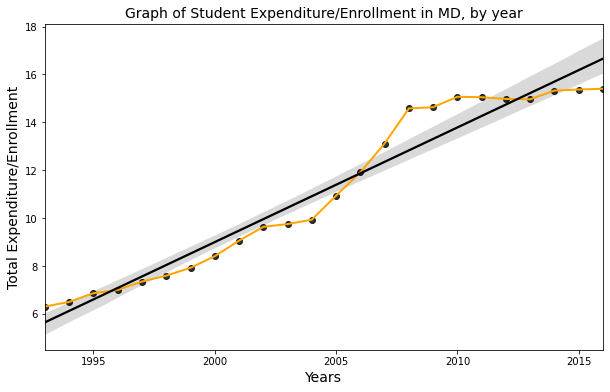

In [37]:
#Showing Progression of funding over years, adjusted for average inflation

year = md_df['YEAR']
enroll = md_df['ENROLL']
total_exp = md_df['TOTAL_EXPENDITURE']
inflation = .0322

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(year, (total_exp/enroll)*(1-inflation), 'orange', linewidth=2, markersize= 12)
sns.regplot(year, (total_exp/enroll)*(1-inflation), color='black')

plt.xscale('linear')

ax.set_title("Graph of Student Expenditure/Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)

Text(0, 0.5, 'Total Student Enrollment')

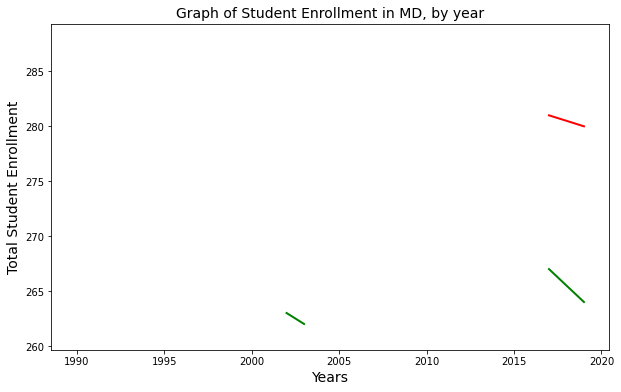

In [28]:
#Showing Progression of funding over years
x = md_df['YEAR']
avg_8_r = md_df['AVG_READING_8_SCORE']
avg_8_m = md_df['AVG_MATH_8_SCORE']

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x, avg_8_r, 'green', linewidth=2, markersize= 12)
ax.plot(x, avg_8_m, 'red', linewidth=2, markersize= 12)

plt.xscale('linear')

ax.set_title("Graph of Student Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Student Enrollment", color='black', size = 14)